<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(159, 6)
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


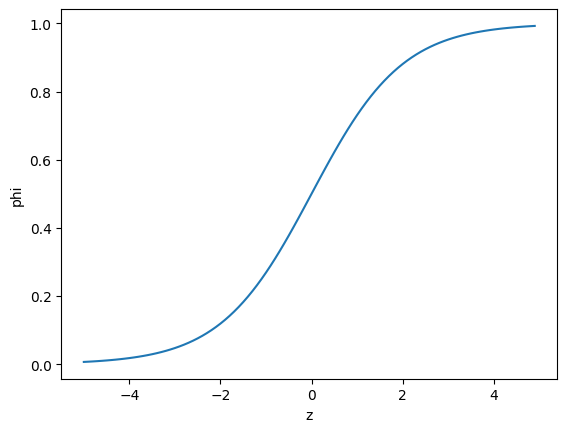

['A' 'C']
[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Brea

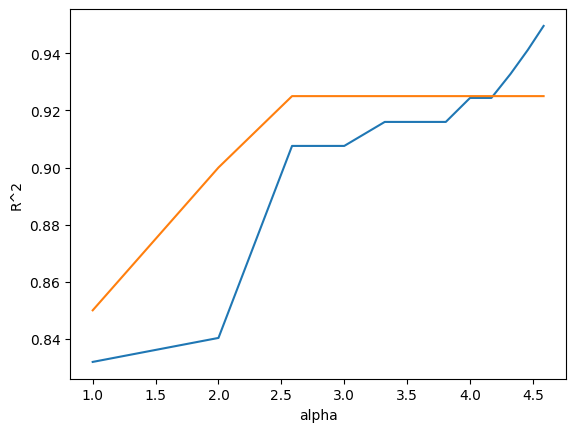

0.9243697478991597
0.925


In [20]:
# k 최근접 분류 -> 여러 클래스 확률 계산
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
# 데이터의 형태 [['Species','Weight','Length','Diagonal','Height','Width']]

# 앞에 5개까지를 출력해줌
fish.head()

print(fish.shape)

# Species의 유니크한 값들만 추출
print(pd.unique(fish['Species']))

# 입력값 넘파이 배열로 변경 -> 2차원 배열이기 때문에 [[]]로 들어감
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

# 출력타겟값 -> 1차원 배열이므로 []만
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

# 훈련데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 정규화 -> K 최근접 이웃
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


# K 최근접 이웃으로

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
# --> 과소적합상태   훈련 89ㅡ ,  테스트 85

# (중요! 헷갈리지 말것 )분류에서는 정확도가 나옴, 회귀문제에서는 R^2가 나옴( 오차범위 )

# classes_ -> KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장됨
print(kn.classes_)

# 다중분류
# 타겟 데이터에 3개 이상의 클래스가 포함되는 문제
# 이진 분류 문제에서 양성 클래스와 음성 클래스를 각각 1, 0 으로 지정하여 나오지만,
# 다중분류문제에서도 타깃값을 숫자로 바꾸어 입력할 수도 있음
# 그러나 사이킷런에서는 문자열로 된 타깃값을 그대로 사용가능
print(kn.predict(test_scaled[:5]))
# 결과보면 숫자가 아니라 문자가 나옴 -- >! 왜? 바로 위에 있음

import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

# kn.kneighbors(test_scaled[3:4]) -> 4번째 데이터 기준으로 가장 가까운 거리와 점들을 나열해줌 -> 이전에 했음
# kn.kneighbors(test_scaled[[3]]) -> 이런 식으로도 사용가능 ! -> 알아는 둘것
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

# 여기서 문제 ! -> 최적의 k 값을 찾을 수 있을까??  위에 n_neighbors 매개변수 말임
# 훈련세트와 테스트세트의 점수가 높은 최대 n_neighbors 값을 찾아보자 !

# 미완 -> 이따가 해봐라
# from sklearn.neighbors import KNeighborsClassifier

# k_list = [-3,-2,-1,0,1,2,3,4,5,6,7,8]

# train_score = []
# test_score = []
# for alpha in alpha_list:
#   kn = KNeighborsClassifier(n_neighbors=3)
#   kn.fit(train_scaled, train_target)

# print(kn.score(train_scaled, train_target))
# print(kn.score(test_scaled, test_target))

# import matplotlib.pyplot as plt

# plt.plot(np.log10(alpha_list), train_score)
# plt.plot(np.log10(alpha_list), test_score)
# plt.xlabel('alpha')
# plt.ylabel('R^2')
# plt.show()


# 로지스틱 회귀

## 시그모이드 함수 그리기 !-------------
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
#---------------------------


# 불리언 인덱싱 예시 ---------------
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])
# ---------------------

# 훈련세트에서 도미와 빙어의 행만 선택한 배열 만들기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes[:])

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(target_bream_smelt[:])

# 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 예측
print(lr.predict(train_bream_smelt[:5]))

# 음성양성 클래스 구분
print(lr.classes_)

# 방정식에 사용되는 기중기(가중치, 계수) 및 절편
print(lr.coef_, lr.intercept_)

# z값은 확률이 아님 -> 임의의 실수 => 이것을 확률로 바꿔줘야함
# 로지스틱 회귀모델로 양성클래스에 대한 z 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값을 확률로 바꿔서 출력 -> 0에 가까울수록 Bream, 1에 가까울수록 Smelt
# 아래 함수 쓰거나 위의 시그모이드 함수 쓰거나 -> 결국 같은 결과
# z = np.arange(-5, 5, 0.1)
# phi = 1 / (1 + np.exp(-z))
from scipy.special import expit

print(expit(decisions))


# 로지스틱 회귀 다중 분류 훈련
# 반복적인 알고리즘 사용 -> 기본값은 max_iter=100인데 불충분 -> 1000으로 할것
# 릿지회귀방식 (L2 규제) 와 같이 계수의 제곱을 규제
# 중요)) 그러나 매개변수 C는 작을수록 규제가 커짐
# 이전것과 비교 )) 선형회귀에서는 alpha였고, 클수록 규제강도가 세졌었음
# 기본값은 C-1이지만 규제를 느슨하게 하기 위해 C= 20으로 상향 조정함

# 훈련
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

# 점수확인
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 예측
print(lr.predict(test_scaled[:5]))

# 확률(소수점 4자리에서 반올림)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 클래스
print(lr.classes_)

# 계수와 절편 -> (7,5) , (7,)
# 5개의 특성을 사용하므로 열은 5개, 타킷이 7개 이므로 행은 7개 즉 z를 7번 계산함
print(lr.coef_.shape, lr.intercept_.shape)



# 확률 계산 -> 소프트맥스 함수
# 여러개의 선형 방정식의 출력값을 0~1 사이로 압축 -> 전체 합이 1이 되도록 변환
# 사진 참고..

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
# 모든 타깃에 대한 z를 이용한 확률 계싼
# -> axis=1 : 각 행, 즉 각 샘플에 대해 소프트맥스를 계산
# 만약 axis를 지정하지 않는다면 모든 값에 대해 소프트맥스를 계산
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

# --------------- 훈련세트와 테스트세트의 점수가 가장 높은 하이퍼파라미터(최적의 파라미터)는?? 찾아보자

train_score = []
test_score = []
k_list = [2,4,6,8,10,12,14,16,18,20,22,24]

for alpha in k_list:
  lr = LogisticRegression(C=alpha, max_iter=1000)
  lr.fit(train_scaled, train_target)

  train_score.append(lr.score(train_scaled, train_target))
  test_score.append(lr.score(test_scaled, test_target))


import matplotlib.pyplot as plt

plt.plot(np.log2(k_list), train_score)
plt.plot(np.log2(k_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# plt.plot(k_list, train_score)
# plt.plot(k_list, test_score)
# plt.xlabel('alpha')
# plt.ylabel('R^2')
# plt.show()

lr = LogisticRegression(C=19, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

